<a href="https://colab.research.google.com/github/ottoGP/byBot/blob/main/byBot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import bybit
import pandas as pd
import ta
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
# Replace these values with your own API credentials
api_key = "E2Ly4T5a13orN8sKYi"
api_secret = "PCcIB9SROHTyQ4B6PPLAEMzQ6wJlyjHdn0Vo"

In [3]:

# Create a Bybit API client
client = bybit.bybit(test=True, api_key=api_key, api_secret=api_secret)

# Get your account balance
result = client.Wallet.Wallet_getBalance().result()


In [4]:
# Creating a DataFrame using the dictionary 
# This variable contains all coins balnces in list format, then is transformed into a Pandas Data Frame for easy manipulation
allCoinsBalance = pd.DataFrame( result[0]["result"])

# Transposing the DataFrame
allCoinsBalance = allCoinsBalance.T

#FUNCTION that allows to availbale balance for a given symbol as parameter
def get_available_balance(dictionary, symbol):
    
    return allCoinsBalance.loc[symbol, "available_balance"]


451.09188911
[*********************100%***********************]  1 of 1 completed


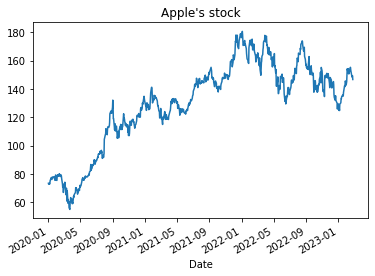

In [7]:
# Displaying the resulting table
print(get_available_balance(allCoinsBalance, "USDT"))


df = yf.download("AAPL", 
                 start="2020-01-01", 
                 end="2023-12-31")

df["Adj Close"].plot(title="Apple's stock");


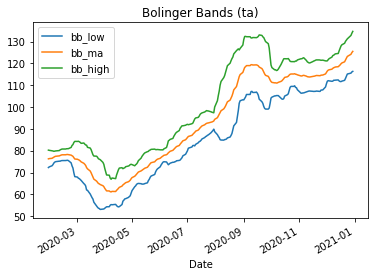

In [6]:
# instantiate the indicator
ta_bbands = ta.volatility.BollingerBands(close=df["Adj Close"], 
                                         window=20, 
                                         window_dev=2)
# copy as we will be adding to it temporarily
ta_df = df.copy()

# add Bollinger Bands
ta_df["bb_ma"] = ta_bbands.bollinger_mavg()
ta_df["bb_high"] = ta_bbands.bollinger_hband()
ta_df["bb_low"] = ta_bbands.bollinger_lband()

ta_df[["bb_low", "bb_ma", "bb_high"]].plot(title="Bolinger Bands (ta)");